In [ ]:
#! pip install  numpy --user
#! pip install  matplotlib --user
#! pip install astropy --user 
#! pip install astroquery --user #

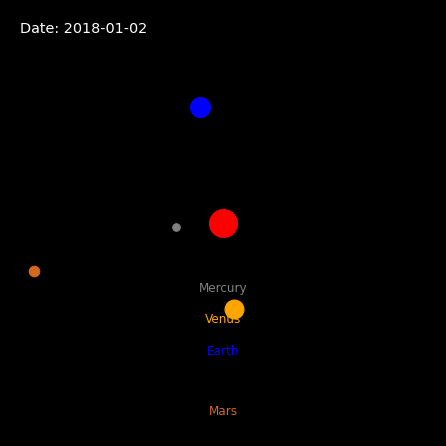

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time
from astroquery.jplhorizons import Horizons
from IPython.display import HTML

sim_start_date = "2018-01-01"     # simulating a solar system starting from this date
sim_duration = 2 * 365                # (int) simulation duration in days
m_earth = 5.9722e24 / 1.98847e30  # Mass of Earth relative to mass of the sun
m_moon = 7.3477e22 / 1.98847e30

class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           # evolve the trajectories
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        self.timestamp.set_text('Date: ' + Time(self.time, format='jd', out_subfmt='date').iso)
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-1.8, 1.8), ylim=(-1.8, 1.8))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun", 28, 'red', [0, 0, 0], [0, 0, 0]))
ss.time = Time(sim_start_date).jd
colors = ['gray', 'orange', 'blue', 'chocolate']
sizes = [0.38, 0.95, 1., 0.53]
names = ['Mercury', 'Venus', 'Earth', 'Mars']
texty = [.47, .73, 1, 1.5]
for i, nasaid in enumerate([1, 2, 3, 4]):  # The 1st, 2nd, 3rd, 4th planet in solar system
    obj = Horizons(id=nasaid, location="@sun", epochs=ss.time, id_type='id').vectors() #Give us the information of 4 first planets (NASA DB)
    ss.add_planet(Object(nasaid, 20 * sizes[i], colors[i], 
                         [np.double(obj[xi]) for xi in ['x', 'y', 'z']], 
                         [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']]))
    ax.text(0, - (texty[i] + 0.1), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')
def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()